# This is the 3rd task of my internship at prodigy infotech.

## The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# https://archive.ics.uci.edu/dataset/222/bank+marketing

## I have to create a decision tree.

# **PLEASE SCROLL DOWN A LITTLE AS THIS STUFF UP HERE IS JUST ME TRYING TO UNDERSTAND THING.**

# 1- Fixed the format and created a new csv files for better readability

In [34]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

bank = pd.read_csv('bank-full.csv', sep=';')

bank.to_csv('bank_test_data.csv', index=False)



In [2]:
bank_additional = pd.read_csv('bank-additional-full.csv', sep=';')

bank_additional.to_csv('bank_additional_new.csv', index=False)
bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
subbed = bank[bank['y']=='yes']
subbed.to_csv('bank_y_subbed.csv', header=True)


In [5]:
unsubbed = bank[bank['y']=='no']
unsubbed.to_csv('bank_y_unsubbed.csv', header=True)

In [6]:
print(len(subbed),len(unsubbed), len(bank))
bank.shape

5289 39922 45211


(45211, 17)

In [7]:
subbed_add = bank_additional[bank_additional['y'] == 'yes']
unsubbed_add = bank_additional[bank_additional['y'] == 'no']
print(len(subbed_add),len(unsubbed_add),len(bank_additional))
bank_additional.shape

4640 36548 41188


(41188, 21)

In [8]:
columns_not_in_bank = bank_additional.columns.difference(bank.columns)
columns_not_in_bank

Index(['cons.conf.idx', 'cons.price.idx', 'day_of_week', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [9]:
bank_full = pd.read_csv('bank-full.csv', sep=';')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# YOU CAN IGNORE THIS CELL

In [10]:




# print(bank.columns)

# # Convert categorical variables into numerical representations using one-hot encoding
# bank = pd.get_dummies(bank)

# # Define features and target variable
# y = bank['y_yes']
# X = bank.drop(columns=['y_yes'])  # Exclude the target column


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize DecisionTreeClassifier with default parameters
# clf = DecisionTreeClassifier()

# # Fit the classifier to your data
# clf.fit(X_train, y_train)

# # Make predictions
# y_pred = clf.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# IGNORE THIS TOO

In [11]:
# import matplotlib.pyplot as plt
# from sklearn import tree

# # Plot the decision tree
# plt.figure(figsize=(20,10))
# tree.plot_tree(clf, feature_names=X_test.columns, class_names=['no', 'yes'], filled=True)
# plt.show()


In [12]:
# def gini(x):
#     total = 0
#     for i, xi in enumerate(x[:-1], 1):
#         total += np.sum(np.abs(xi - x[i:]))
#     return total / (len(x)**2 * np.mean(x))


In [13]:
# bank_full.columns

In [14]:
# gini_indices = []

# for column in bank_full.columns:
#     print(column)
#     ginis = gini(bank_full[column])
#     print(ginis)
#     gini_indices.append((f"{column}" , ginis))
# gini_indices

# AFTER SEARCHING FOR THIS AND THAT AND TRYING TO FIND OUT HOW TO ACTUALLY DO THIS TASK I HAVE RECIEVED. I THINK I HAVE UNDERSTOOD IT.

In [15]:
# bank_dummies = pd.get_dummies(bank)
# bank_dummies.head()

# Converting to dummies

In [16]:
# bank_full_dummies = pd.get_dummies(bank_full)
# bank_full_dummies.head()

# Spliting income and outcome variables

In [61]:
feature_columns= ['age','job','duration','education','default','balance','housing','loan','previous','poutcome']
bank_feature = bank[feature_columns]
bank_labels = bank['y']


In [62]:
bank_full_feature = bank_full[feature_columns]
bank_full_labels = bank_full['y']


In [63]:
bank_feature.shape

(45211, 10)

In [64]:
bank_full_feature.shape

(45211, 10)

In [65]:
bank_feature.head(10)

,age,job,duration,education,default,balance,housing,loan,previous,poutcome
0,58,management,261,tertiary,no,2143,yes,no,0,unknown
1,44,technician,151,secondary,no,29,yes,no,0,unknown
2,33,entrepreneur,76,secondary,no,2,yes,yes,0,unknown
3,47,blue-collar,92,unknown,no,1506,yes,no,0,unknown
4,33,unknown,198,unknown,no,1,no,no,0,unknown
5,35,management,139,tertiary,no,231,yes,no,0,unknown
6,28,management,217,tertiary,no,447,yes,yes,0,unknown
7,42,entrepreneur,380,tertiary,yes,2,yes,no,0,unknown
8,58,retired,50,primary,no,121,yes,no,0,unknown
9,43,technician,55,secondary,no,593,yes,no,0,unknown


# Choosing train and test data

In [66]:
train = pd.get_dummies(bank_feature)
train_labels = bank_labels
test = pd.get_dummies(bank_full_feature)
test_labels = bank_full_labels


# Training my model

In [67]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(train,train_labels)
predict = classifier.predict(test)


In [68]:
print("the accuracy for this model is :", metrics.accuracy_score(train_labels,test_labels))

the accuracy for this model is : 1.0


# Visualizing the Decision Tree

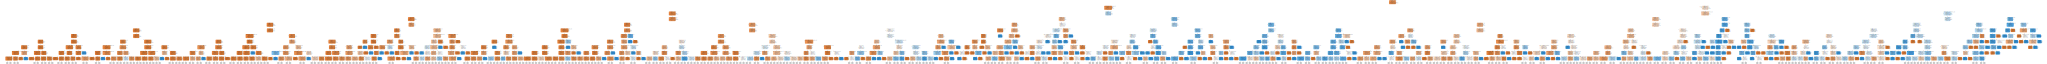

In [69]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data ,filled=True,
                rounded=True,special_characters=True,max_depth=10, 
                feature_names=train.columns,class_names=['Yes','No'])
# Convert StringIO object to string
dot_data_str = dot_data.getvalue()
graph = graphviz.Source(dot_data_str, format="png", ) 

graph